<a href="https://colab.research.google.com/github/01Sagar10/HeartdiseasePredictions_-unbalanced-data/blob/main/AllModels_ForLoop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import catboost as catboost
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
import matplotlib.pyplot as plt
import random
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.3 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science projects /Capstone Heart disease/HeartDisease.csv')
#df.head()

In [ ]:
df['PhysHlth'] = df['PhysHlth'].apply(lambda x : random.randint(1,30) if x  == 0 else x)
df['MentHlth'] = df['MentHlth'].apply(lambda x : random.randint(1,30) if x == 0 else x)

df['HealthIndex'] = round((( df['PhysHlth'] + df['MentHlth'] + df['PhysActivity'] ) / 3),2)
df['FruVeg'] = (df['Fruits'] + df['Veggies']) / 2
df['BPCH'] = (df['HighBP'] + df['HighChol']) / 2
df['EduInc'] = (df['Education'] + df['Income']) / 2
df['BMI'] = df['BMI'] ** 2
df['SmAlDiAge'] = (df['Smoker']+df['HvyAlcoholConsump'] + df['Diabetes'] + df['Age']) / 4

df = df.drop(['PhysHlth', 'MentHlth', 'PhysActivity', 'Fruits', 'Veggies', 'HighBP', 'HighChol', 'Education', 'Income',
            'Smoker', 'HvyAlcoholConsump', 'Diabetes', 'Age'], axis = 1)
print(df.head())


X = df.drop('HeartDiseaseorAttack', axis = 1)
y = df['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True)

   HeartDiseaseorAttack     BMI  Sex  HealthIndex  FruVeg  BPCH  EduInc  \
0                   0.0  1600.0  0.0        11.00     0.5   1.0     3.5   
1                   0.0   625.0  0.0         6.00     0.0   0.0     3.5   
2                   0.0   784.0  0.0        20.00     0.5   1.0     6.0   
3                   0.0   729.0  0.0         5.33     1.0   0.5     4.5   
4                   0.0   576.0  0.0         8.33     1.0   1.0     4.5   

   SmAlDiAge  
0       2.50  
1       2.00  
2       2.25  
3       2.75  
4       2.75  


In [ ]:
pd.DataFrame(X_train.head())

,BMI,Sex,HealthIndex,FruVeg,BPCH,EduInc,SmAlDiAge
180429,625.0,0.0,1.67,0.5,1.0,5.0,3.25
234517,576.0,1.0,5.67,0.5,0.0,7.0,3.00
205493,1156.0,0.0,15.33,1.0,1.0,4.0,2.50
83634,625.0,0.0,10.00,0.5,1.0,5.0,2.25
147147,1444.0,0.0,14.33,1.0,0.5,7.0,2.50


In [ ]:
models = {'Logistic' : LogisticRegression(),
         'RandomForest' : RandomForestClassifier(),
         'GradientBoost' : GradientBoostingClassifier(),
          'XGB' : XGBClassifier()
         }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #performance
    model_f1_score = f1_score(y_test, y_test_pred)
    model_precision_score = precision_score(y_test, y_test_pred)
    model_recall_score = recall_score(y_test,y_test_pred)
    model_auc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Performance on test set', )
    print(f'F1_Score{round(model_f1_score,2)}')
    print(f'Precision_score{round(model_precision_score,2)}')
    print(f'Recall_score {round(model_recall_score,2)}')
    print(f'Auc score {round(model_auc_score,2)}')

    print("="*35)
    print("\n")

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic
Performance on test set
F1_Score0.06
Precision_score0.43
Recall_score 0.03
Auc score 0.52


RandomForest
Performance on test set
F1_Score0.15
Precision_score0.27
Recall_score 0.11
Auc score 0.54


GradientBoost
Performance on test set
F1_Score0.02
Precision_score0.54
Recall_score 0.01
Auc score 0.51


XGB
Performance on test set
F1_Score0.04
Precision_score0.45
Recall_score 0.02
Auc score 0.51




In [ ]:
rf_params = {'max_depth' : [5,10,15],
         'criterion' : ['gini', 'entropy'],
         'class_weight' : ['balanced', 'balanced_subsample'],
         'max_features' : ['sqrt', 'log2', None],
         'n_estimators' : [100, 150, 200],
         'min_samples_split' : [2, 10, 20]}

rf_params

{'max_depth': [5, 10, 15],
 'criterion': ['gini', 'entropy'],
 'class_weight': ['balanced', 'balanced_subsample'],
 'max_features': ['sqrt', 'log2', None],
 'n_estimators': [100, 150, 200],
 'min_samples_split': [2, 10, 20]}

In [ ]:
randomcv_models = [('RF', RandomForestClassifier(), rf_params),
                   #("DT", DecisionTreeClassifer(), dt_params),
                  ]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                                param_distributions = params,
                                n_iter = 100,
                                cv = 3,
                                scoring = 'roc_auc',
                                verbose = 1,
                                n_jobs = -1,
                                error_score = 'raise'
                                )

    try:
      random.fit(X,y)
      model_param[name] = random.best_params_
    except Exception as e:
      print(f'Error during fitting for {name} : {e}')

for model_name in model_param:
    print(f'------------best params for {model_name}---------------')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


------------best params for RF---------------
{'n_estimators': 200, 'min_samples_split': 20, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


RandomForest
Performance on test set
F1_Score0.334
Precision_score0.212
Recall_score 0.791
Auc score 0.746


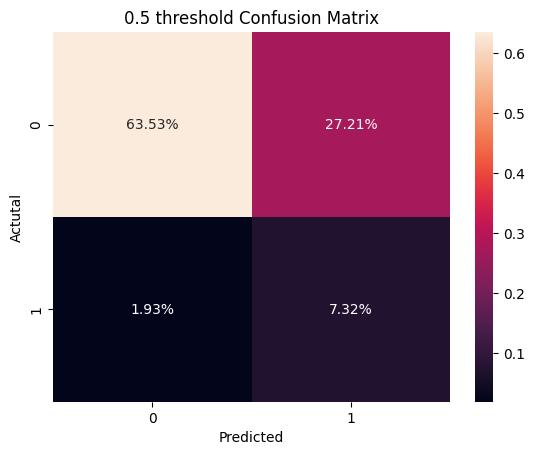

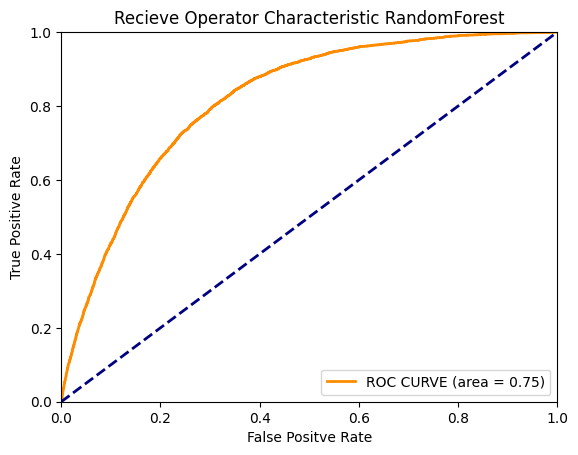

Optimal threshold 0.4919182014093316
optimal_f1score 0.333
optimal_precision0.21
optimal_recall 0.801
optimal_auc 0.747


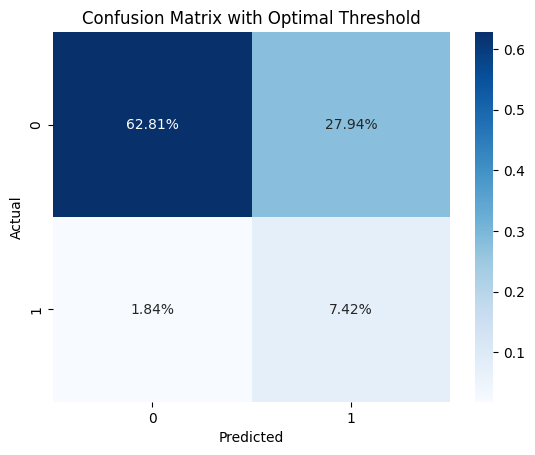

           Threshold 0.5  Optimal Threshold 0.49
F1_score           0.334                   0.333
Precision          0.212                   0.210
Recall             0.791                   0.801
AUC score          0.746                   0.747




In [ ]:
models = {'RandomForest' : RandomForestClassifier(n_estimators = 200,
                                                min_samples_split = 20,
                                                max_features = 'log2',
                                                max_depth = 10,
                                                criterion = 'entropy',
                                                class_weight = 'balanced_subsample')}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #predict
    y_test_pred = model.predict(X_test)

    #performance
    model_f1_score = round(f1_score(y_test, y_test_pred),3)
    model_precision_score = round(precision_score(y_test, y_test_pred),3)
    model_recall_score = round(recall_score(y_test,y_test_pred),3)
    model_auc_score = round(roc_auc_score(y_test,y_test_pred),3)

    print(list(models.keys())[i])

    print('Performance on test set', )
    print(f'F1_Score{model_f1_score}')
    print(f'Precision_score{model_precision_score}')
    print(f'Recall_score {model_recall_score}')
    print(f'Auc score {model_auc_score}')

    #plt Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%')
    plt.xlabel('Predicted')
    plt.ylabel('Actutal')
    plt.title(f'0.5 threshold Confusion Matrix')
    plt.show()

    #get best threshold
    probabilites = model.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, probabilites)
    j_statistic = tpr-fpr
    optimal_idx = j_statistic.argmax()
    optimal_threshold = threshold[optimal_idx]
    optimal_ypred = probabilites >= optimal_threshold

    #plot a ROC Curve
    plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC CURVE (area = %0.2f)' % model_auc_score , lw = 2)
    plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positve Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Recieve Operator Characteristic {list(models.keys())[i]}')
    plt.legend(loc = 'lower right')
    plt.show()


    print(f'Optimal threshold {optimal_threshold}')

    #print scores with optimal threshold
    optimal_f1score = round(f1_score(y_test, optimal_ypred),3)
    optimal_precisionScore = round(precision_score(y_test, optimal_ypred),3)
    optimal_recallscore = round(recall_score(y_test, optimal_ypred),3)
    optimal_auc_score = round(roc_auc_score(y_test, optimal_ypred),3)
    print(f'optimal_f1score {optimal_f1score}')
    print(f'optimal_precision{optimal_precisionScore}')
    print(f'optimal_recall {optimal_recallscore}')
    print(f'optimal_auc {optimal_auc_score}')

    #plot confusion matrix with Optimal threshold
    confusion_matrix = confusion_matrix(y_test, optimal_ypred)
    sns.heatmap(confusion_matrix/ np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix with Optimal Threshold')
    plt.show()


    #make a DataFrame

    threshold_0_5 = [model_f1_score, model_precision_score, model_recall_score, model_auc_score]
    threshold_optimal = [optimal_f1score, optimal_precisionScore, optimal_recallscore, optimal_auc_score]
    metric_names = ['F1_score', 'Precision', 'Recall', 'AUC score']
    df_scores = pd.DataFrame(
        {'Threshold 0.5': threshold_0_5,
         f'Optimal Threshold {optimal_threshold:.2f}': threshold_optimal
        },
        index=metric_names )
    print(df_scores)
    print("="*40)
    print('\n')